## Bibliotecas e módulos

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções implementadas

In [2]:
#Menor/maior distância interna aos dados
def find_minmax_tau(x):
    m = x.shape[0]
    minTau, maxTau = np.infty, -1*np.infty
    for i in range(m-1):
        for j in range(i+1,m):
            dist = np.linalg.norm( x[i,:] - x[j,:])
            if dist < minTau: minTau = dist
            if dist > maxTau: maxTau = dist
    return minTau, maxTau


#Implementação do modelo BSAS
def BSAS(x,tau,maxClusters):
    c = 0  #Inicialização do contador de agrupamentos
    G = {} #Incialização de um dicionário
    ind = np.zeros(x.shape[0])-1 #Criação da lista de indicador de agrupamentos

    G[c] = []; G[c].append( x[0,:] ) #Inclusão do primeiro exemplo
    vecMu = []; vecMu.append( x[0,:] ) #Incialização do representante do G[1]
    ind[0] = c

    for i in range(1,x.shape[0]):
        diss = np.zeros(c+1) #adição para compatibilizar 'c' com quantidade de agrupamentos
        for j in range(c+1):
            diss[j] = np.linalg.norm( x[i,:] - vecMu[j] )
        k = np.argmin(diss)
    
        if (diss[k] > tau) and (c < maxClusters-1):
            c += 1
            G[c] = []; G[c].append( x[i,:] )
            ind[i] = c
            vecMu.append( x[i,:] )
        else:
            G[k].append( x[i,:] )
            ind[i] = k
            vecMu[k] = ((len(G[k]) -1)*vecMu[k] + x[i,:])/len(G[k])
    
    return ind


#Implementação do método MBSAS------------------------------------
def MBSAS(x,tau,maxClusters):
    c = 0  #Inicialização do contador de agrupamentos
    G = {} #Incialização de um dicionário
    ind = np.zeros(x.shape[0])-1 #Criação da lista de indicador de agrupamentos

    G[c] = []; G[c].append( x[0,:] ) #Inclusão do primeiro exemplo
    vecMu = []; vecMu.append( x[0,:] ) #Incialização do representante do G[1]
    ind[0] = c

    #Fase de definição dos agrupamentos--------------------
    for i in range(1,x.shape[0]):
        diss = np.zeros(c+1) #adição para compatibilizar 'c' com quantidade de agrupamentos
        for j in range(c+1):
            diss[j] = np.linalg.norm( x[i,:] - vecMu[j] )
        k = np.argmin(diss)
    
        if (diss[k] > tau) and (c < maxClusters-1):
            c += 1
            G[c] = []; G[c].append( x[i,:] )
            ind[i] = c
            vecMu.append( x[i,:] )
    
    #Fase de associação aos agrupamentos------------------
    diss = np.zeros(c+1)
    for i in range(0,x.shape[0]):
        if ind[i] == -1:
            for j in range(c+1):
                diss[j] = np.linalg.norm( x[i,:] - vecMu[j] )
        
            k = np.argmin(diss)
            G[k].append( x[i,:] )
            ind[i] = k
            vecMu[k] = ((len(G[k]) -1)*vecMu[k] + x[i,:])/len(G[k])

    return ind

## Simulação e visualização dos dados

[(-7.517526577754113, 5.101942181379384),
 (-11.825078554442136, 5.546385296559158)]

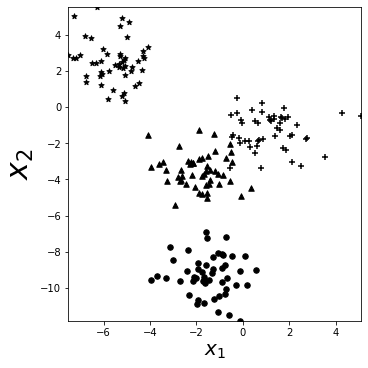

In [3]:
np.random.seed(2)
agrupamentos = 4
x, y = make_blobs(n_features=2, centers=agrupamentos, n_samples=200)

marr = ['o','+','^','*']
    
FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráficos...
ax = fig.add_subplot(spec[0, 0])
for i in range(agrupamentos):
    pos =  np.where(y == i)
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c='k', s=30)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=30)
ax.set(xlim=(np.min(x[:,0]), np.max(x[:,0])), ylim=(np.min(x[:,1]), np.max(x[:,1])))

##  Determinação de agrupamentos via BSAS e MBSAS
* Os parâmetros de BSAS/MBSAS são:
    * x: conjunto de dados ($\mathcal{I}$)
    * maxClusters: número máximo de agrupamentos permitidos ($c$)
    * tau: limiar de dissimilaridade ($\tau$)

In [4]:
agrup1 = BSAS(x,2.0,4) #(x,tau,maxClusters)
agrup2 = BSAS(x,3.0,10)
agrup3 = MBSAS(x,2.0,4)
agrup4 = MBSAS(x,3.0,10)

## Visualização dos agrupamentos

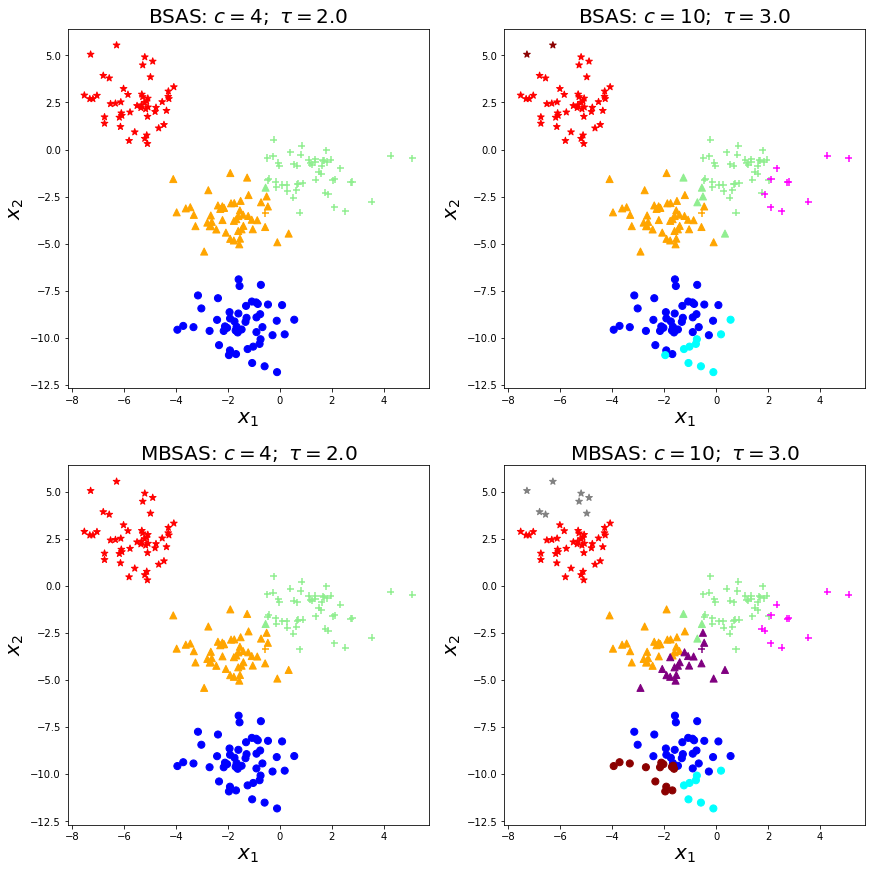

In [5]:
path_out = 'graficosBSAS-MBSAS.png'

#Identificação dos agrupamentos
cores = ['red','blue','lightgreen','orange','magenta','cyan','darkred','grey','purple','darkgreen']

FS = (12,12) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)


#Subgráfico [0,0]
ax = fig.add_subplot(spec[0,0])
for i in range(agrupamentos):
    pos =  np.array(np.where(y == i))[0]
    vecCor = []
    for j in agrup1[pos]: 
        vecCor.append(cores[int(j)])
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c=vecCor, s=50)
ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_2$', fontsize=20)
ax.set_title(r'BSAS: $c = 4; \ \tau = 2.0$',fontsize=20)


#Subgráfico [0,1]
ax = fig.add_subplot(spec[0,1])
for i in range(agrupamentos):
    pos =  np.array(np.where(y == i))[0]
    vecCor = []
    for j in agrup2[pos]: vecCor.append(cores[int(j)])
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c=vecCor, s=50)
ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_2$', fontsize=20)
ax.set_title(r'BSAS: $c = 10; \ \tau = 3.0$',fontsize=20)


#Subgráfico [1,0]
ax = fig.add_subplot(spec[1,0])
for i in range(agrupamentos):
    pos =  np.array(np.where(y == i))[0]
    vecCor = []
    for j in agrup3[pos]: vecCor.append(cores[int(j)])
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c=vecCor, s=50)
ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_2$', fontsize=20)
ax.set_title(r'MBSAS: $c = 4; \ \tau = 2.0$',fontsize=20)


#Subgráfico [1,1]
ax = fig.add_subplot(spec[1,1])
for i in range(agrupamentos):
    pos =  np.array(np.where(y == i))[0]
    vecCor = []
    for j in agrup4[pos]: vecCor.append(cores[int(j)])
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c=vecCor, s=50)
ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_2$', fontsize=20)
ax.set_title(r'MBSAS: $c = 10; \ \tau = 3.0$',fontsize=20)


plt.savefig(path_out,dpi=300)
plt.show()